# Task 1 - Data Loading and Visualization

This notebook is a small introduction to our data, that we are working with on this project
> Afonso Cunha's home HPC path: /zhome/ca/7/203238
>
> Data's Path: /dtu/projects/02613_2025/data/modified_swiss_dwellings/


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import os
import sys

In [2]:
current_dir = os.getcwd()

data_dir = os.path.join(current_dir, '..', 'Data')

In [3]:
def load_data(building_id):
    """Loads the domain and interior mask for a given building."""
    u = np.load(join(data_dir, f"{building_id}_domain.npy")) 
    interior_mask = np.load(join(data_dir, f"{building_id}_interior.npy"))
    return u, interior_mask

def visualize_floorplan(building_id):
    """Visualizes the floor plan's domain and interior mask."""
    u, interior_mask = load_data(building_id)

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    im1 = axs[0].imshow(u, cmap="coolwarm", origin="upper")
    axs[0].set_title(f"Initial Temperature Grid: {building_id}")
    plt.colorbar(im1, ax=axs[0])
    
    im2 = axs[1].imshow(interior_mask, cmap="gray", origin="upper")
    axs[1].set_title(f"Interior Mask: {building_id}")
    plt.colorbar(im2, ax=axs[1])

    plt.show()

In [4]:
def inspect_floorplan(building_id):
    domain = np.load(os.path.join(data_dir, f"{building_id}_domain.npy"))
    interior = np.load(os.path.join(data_dir, f"{building_id}_interior.npy"))

    print(f"--- Floorplan ID: {building_id} ---")
    print(f"Domain shape: {domain.shape}, dtype: {domain.dtype}")
    print(f"Interior mask shape: {interior.shape}, dtype: {interior.dtype}")
    print()
    print("Domain unique values:", np.unique(domain))
    print("Interior mask unique values:", np.unique(interior))


In [5]:
def temp_distribution(building_id):
    """Visualizes the temperature distribution in the building."""
    u, interior_mask = load_data(building_id)
    interior_mask = interior_mask[1:-1, 1:-1]
    
    u_interior = u[1:-1, 1:-1][interior_mask]

    plt.figure(figsize=(8, 6))
    plt.hist(u_interior, bins=50, color='skyblue', edgecolor='black')
    plt.title('Temperature Distribution Inside Rooms')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

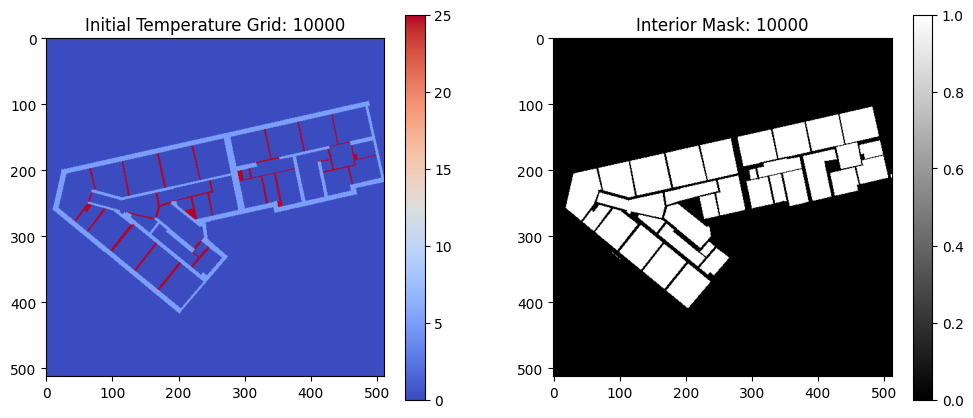

In [6]:

building_id = "10000" 
visualize_floorplan(building_id)

In [7]:
inspect_floorplan(building_id)

--- Floorplan ID: 10000 ---
Domain shape: (512, 512), dtype: float64
Interior mask shape: (512, 512), dtype: bool

Domain unique values: [ 0.  5. 25.]
Interior mask unique values: [False  True]


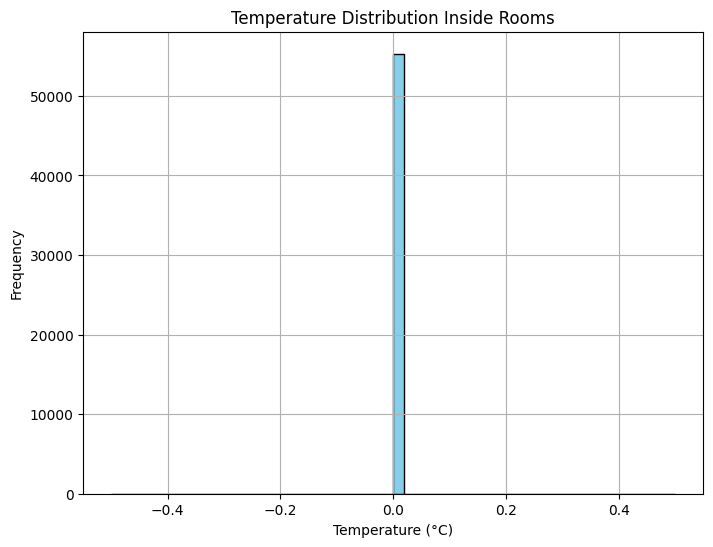

In [8]:
temp_distribution(building_id)